### To_Do
<br>1) Select an outcome: App Price
<br>2) Choose one or two categorical value
<br>3) Choose three or four continuous value 
<br>4) Explore data univriate and bivariate
<br>5) create 10 features explain reasoning behind each one

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# upload date set into data frame
df = pd.read_csv("/Users/OzlemCelik/Desktop/googleplaystore_3.csv", low_memory=False)

#drop duplicate rows
df = df.drop_duplicates()

#clean null data
df.dropna(how='any', inplace=True)

<b><br>2) Choose one or two categorical value
<br>3) Choose three or four continuous value

### Feature Study
Categorical Value:
   * Category: Type of Category
   * Type: Application Free or Paid

Continuous Value:
   * Rating: Application Rating
   * Reviews: Reviews of application
   * Installs: Number of installation
   * Price: Application Price

In [4]:
# all columns of the dataset
print("Features", df.columns)

# number of datapoints
print("Number of data points: ", len(df))

Features Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
Number of data points:  8886


In [5]:
## select the columns that determined above

selected_columns = ['Category','Type', 'Rating', 'Reviews',
                        'Installs','Price']
#Drop of the $ sign
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))


#Clean the '+' sign and ',' sign and convert to integer
df.Installs = df.Installs.apply(lambda x: x.replace(',',''))
df.Installs = df.Installs.apply(lambda x: x.replace('+',''))
df.Installs = df.Installs.apply(lambda x: int(x))

#Subset the Data 
df_subset = df[selected_columns]
df_subset.head()

,Category,Type,Rating,Reviews,Installs,Price
0,ART_AND_DESIGN,Free,4.1,159,10000,0.0
1,ART_AND_DESIGN,Free,3.9,967,500000,0.0
2,ART_AND_DESIGN,Free,4.7,87510,5000000,0.0
3,ART_AND_DESIGN,Free,4.5,215644,50000000,0.0
4,ART_AND_DESIGN,Free,4.3,967,100000,0.0


# 4) Explore data univriate 

### 4.a) For two categorical variables:
    
  * A barplot, with the height of each bar indicating the number of datapoints in each combination of levels of the two variables

   * A table of counts, giving the number of datapoints for each combination of levels of the two variables

   * Chi-square tests that indicate whether one combination of levels is significantly smaller or larger than the rest.

   * Look for: Subgroups with very small counts relative to the other subgroups

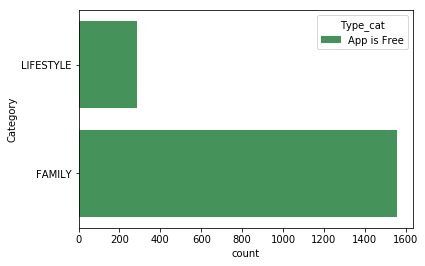

Type_cat   App is Free
Category              
FAMILY            1560
LIFESTYLE          287
Power_divergenceResult(statistic=877.3844071467245, pvalue=8.095585325659696e-193)


In [6]:
# Add a second categorical variable.

df_2cat = df_subset.loc[
    ((df['Category'] == 'FAMILY') | (df['Category'] == 'LIFESTYLE')) & (df['Type'] == 'Free'),
    ['Category','Type']
]

# Create a text variable so that output is easier to interpret.
df_2cat['type_cat'] = None
df_2cat.loc[df_2cat['Type'] == 'Free', 'Type_cat'] = 'App is Free'
df_2cat.loc[df_2cat['Type'] == 'Paid', 'Type_cat'] = 'App is Paid'

# Plot counts for each combination of levels.
sns.countplot(y="Category", hue="Type_cat", data=df_2cat, palette="Greens_d")
plt.show()



# Table of counts
counttable = pd.crosstab(df_2cat['Category'], df_2cat['Type_cat'])
print(counttable)


# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))


### 4.b)For a continuous and a categorical pair:
   
   * Box, violin, or similar plots estimate the value of the continuous variable for each value of the categorical variable.
    
   * Descriptive statistics, including estimates of central tendency and variance, for the continuous variable at each level of the categorical variable.
   
   * T-tests and ANOVA
    
   * Look for: Outliers in each group, very small groups

Ttest_indResult(statistic=-5.401299022897294, pvalue=7.184419652727726e-08)


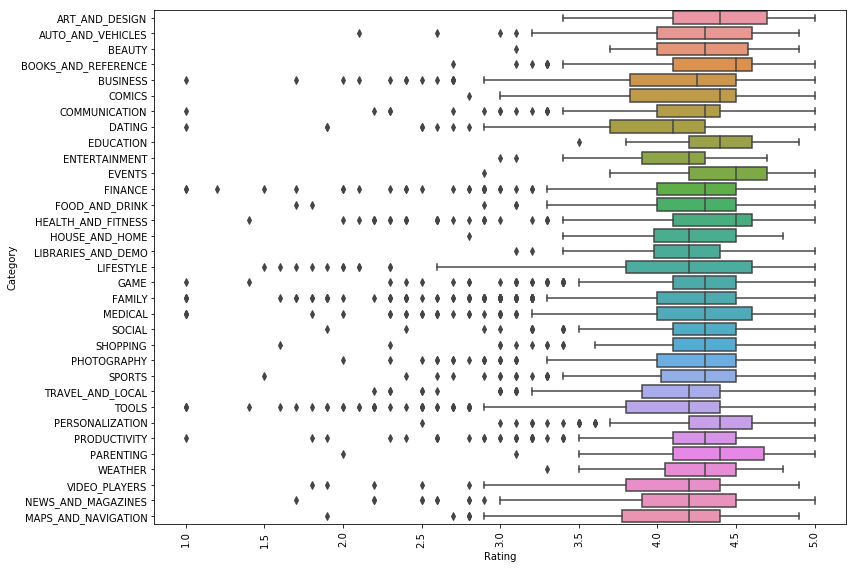

In [7]:
plt.figure(figsize= (12,8))
sns.boxplot(x = 'Rating', y= 'Category', data = df)
plt.xticks(rotation =90)
plt.tight_layout()


df_Rating_Family=df.loc[df.Category == 'FAMILY']['Rating']
df_Rating_Game = df.loc[df.Category=='GAME']['Rating']

from scipy.stats import ttest_ind
print(ttest_ind(df_Rating_Family,df_Rating_Game,equal_var=False))

### 4.c)For two continuous variables:
 * The scatterplot, which you’ve already encountered, represents the relationship between two continuous variables.  For this sort of wide-scale dataset investigation, we can go a step further and create a scatterplot matrix that shows all the bivariate relationships in one plot made up of subplots.
 * The correlation coefficient *r* is a numeric representation of the linear relationship between two continuous variables.  Correlations range from -1 (as values in one variable go up, values in the other go down) to 0 (no relationship between the variables) to 1 (as values in one variable go up, values in the other go up as well).
 * Look for: two-dimensional outliers that represent unusual combinations of values

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


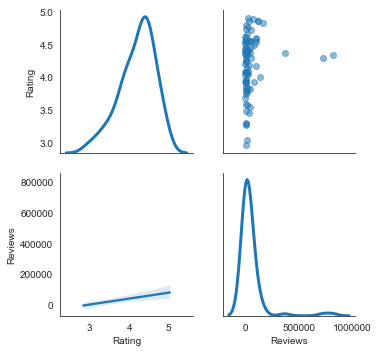

In [8]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

# Take a subset of the data to make plots clearer.
df_2cat = df.loc[
    ((df['Category'] == 'FAMILY') | (df['Category'] == 'LIFESTYLE')) & (df['Type'] == 'Free'),
    ['Category','Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price']]

# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot.
df_jittered = df_2cat.loc[:, 'Rating':'Reviews'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()


<b>5) Create 10 features 

In [13]:
features= pd.get_dummies(df['Category'])

# Category dummy.
features= np.where((df['Category'].isin(['EDUCATION', 'FAMILY'])), 1, 0)

print(pd.crosstab(features, df['Category']))

Category  ART_AND_DESIGN  AUTO_AND_VEHICLES  BEAUTY  BOOKS_AND_REFERENCE  \
row_0                                                                      
0                     61                 73      42                  177   
1                      0                  0       0                    0   

Category  BUSINESS  COMICS  COMMUNICATION  DATING  EDUCATION  ENTERTAINMENT  \
row_0                                                                         
0              270      58            307     159          0            111   
1                0       0              0       0        129              0   

Category   ...     PERSONALIZATION  PHOTOGRAPHY  PRODUCTIVITY  SHOPPING  \
row_0      ...                                                            
0          ...                 308          304           334       202   
1          ...                   0            0             0         0   

Category  SOCIAL  SPORTS  TOOLS  TRAVEL_AND_LOCAL  VIDEO_PLAYERS  WEATHER  
r

In [14]:
#Subset the Data And 2nd feature
df_subset = df[selected_columns]
df_subset.head()

,Category,Type,Rating,Reviews,Installs,Price
0,ART_AND_DESIGN,Free,4.1,159,10000,0.0
1,ART_AND_DESIGN,Free,3.9,967,500000,0.0
2,ART_AND_DESIGN,Free,4.7,87510,5000000,0.0
3,ART_AND_DESIGN,Free,4.5,215644,50000000,0.0
4,ART_AND_DESIGN,Free,4.3,967,100000,0.0


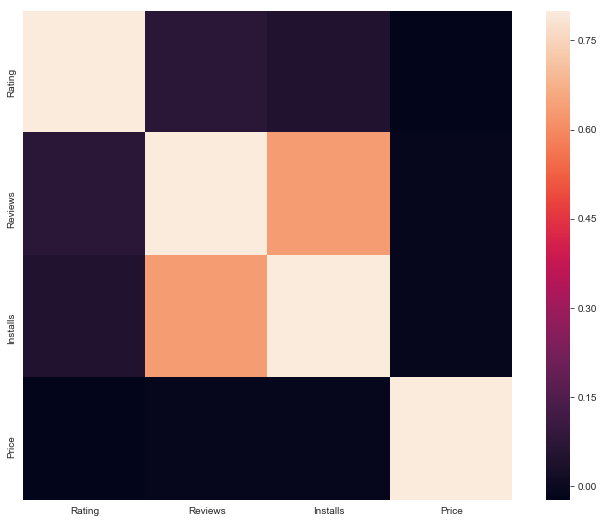

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [15]:
corrmat = df_subset.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

means = df_subset[['Rating','Reviews','Installs']].mean(axis=0)
stds = df_subset[['Rating','Reviews','Installs']].std(axis=0)
features['test'] = ((df[['Rating','Reviews','Installs']] - means) // stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df_subset.loc[:, ['Rating','Reviews','Installs']]
plotdf['test'] =features['test']
corrmat2 = plotdf.corr()

print(corrmat2)

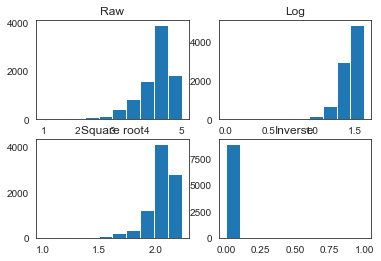

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [19]:
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['Rating'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['Rating'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['Rating'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['Rating'].dropna())
plt.title('Inverse')
plt.show()

# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.

features['log_Rating'] = np.log(df['Rating'])

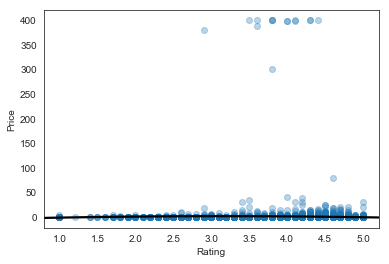

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [18]:

sns.regplot(
    df['Rating'],
    y=df['Price'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['Rating_squared'] = df['Rating'] * df['Rating']

In [149]:

features['Rating'] = max(df['Installs']) - df['Installs']

sns.regplot(
    df['Reviews'],
    features['Rating'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('Installs')
plt.ylabel('Reviews')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


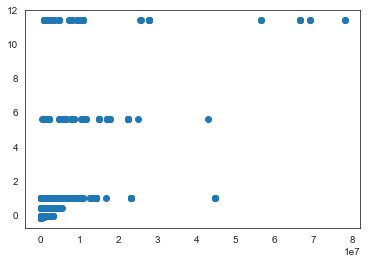

             Rating       Reviews      Installs         Price
count  8.886000e+03  8.886000e+03  8.886000e+03  8.886000e+03
mean   1.276194e-15  1.599241e-18 -3.198482e-18 -2.318899e-17
std    1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00
min   -6.102541e+00 -1.628071e-01 -1.909808e-01 -5.949937e-02
25%   -3.597992e-01 -1.627510e-01 -1.908651e-01 -5.949937e-02
50%    2.144750e-01 -1.611821e-01 -1.851938e-01 -5.949937e-02
75%    5.973244e-01 -1.382661e-01 -1.331100e-01 -5.949937e-02
max    1.554448e+00  2.673414e+01  1.138319e+01  2.464119e+01


In [150]:
from sklearn import preprocessing

# Select only numeric variables to scale.
df_num = df.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df_num['Reviews'], df_scaled['Installs'])
plt.show()

# Lookit all those matching means and standard deviations!
print(df_scaled.describe())

In [17]:
features['Rating_of_Paid_app'] = np.where(df['Rating'] == 1, 0)

# Create the interaction.
features['Paid_App'] = features['Rating'] * features['Rating_of_Paid_app']

# A plot of an interaction.
# Add the 'tvtot' feature to the features data frame for plotting.
features['Rating'] = df['Reviews']
sns.lmplot(
    x='Rating',
    y='Type',
    hue='Rating_of_Paid_app',
    data=features,
    scatter=False
)
plt.show()

ValueError: either both or neither of x and y should be given